# Problem 1: A Detailed View to MNIST Classiﬁcation 

### Training 5-layer Deep Neural Network on MNIST data

In [4]:
# Importing MNIST data 
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Learning rate, batch size and number of epochs
alpha = 0.02
batch_size = 60
epochs = 15

# Placeholders for X and Y training 
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])


## FORWARD PROPOGATION
# Weights and Biases for hidden layers (5 hidden layers with 1024 hidden units). Using He initialization for W
W1 = tf.Variable(tf.random_normal([784,1024],stddev=1)*np.sqrt(2/784), name='w1') 
b1 = tf.Variable(tf.zeros([1024]), trainable=True, name="b1")

W2 = tf.Variable(tf.random_normal([1024,1024],stddev=1)*np.sqrt(2/1024), name='w2') 
b2 = tf.Variable(tf.zeros([1024]), trainable=True, name="b2")

W3 = tf.Variable(tf.random_normal([1024,1024],stddev=1)*np.sqrt(2/1024), name='w3') 
b3 = tf.Variable(tf.zeros([1024]), trainable=True, name="b3")

W4 = tf.Variable(tf.random_normal([1024,1024],stddev=1)*np.sqrt(2/1024), name='w4') 
b4 = tf.Variable(tf.zeros([1024]), trainable=True, name="b4")

W5 = tf.Variable(tf.random_normal([1024,1024],stddev=1)*np.sqrt(2/1024), name='w5') 
b5 = tf.Variable(tf.zeros([1024]), trainable=True, name="b5")

Wl = tf.Variable(tf.random_normal([1024,10],stddev=1)*np.sqrt(2/1024), name='wl') 
bl = tf.Variable(tf.zeros([10]), trainable=True, name="bl")

# Outputs of hidden layers
z1 = tf.add(tf.matmul(X,W1), b1)
a1 = tf.nn.relu(z1)

z2 = tf.add(tf.matmul(a1,W2), b2)
a2 = tf.nn.relu(z2)

z3 = tf.add(tf.matmul(a2,W3), b3)
a3 = tf.nn.relu(z3)

z4 = tf.add(tf.matmul(a3,W4), b4)
a4 = tf.nn.relu(z4)

z5 = tf.add(tf.matmul(a4,W5), b5)
a5 = tf.nn.relu(z5)

zl = tf.add(tf.matmul(a5,Wl), bl)
al = tf.nn.softmax(zl)

y = tf.clip_by_value(al, -0.00000001, 0.9999999)

# Cost as cross entropy and optimizer
cost = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(y) + (1 - Y) * tf.log(1 - y), axis=1))

optimiser = optimiser = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)


_init = tf.global_variables_initializer()

# Accuracy
predictions = tf.equal(tf.argmax(Y, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(predictions, tf.float32))


with tf.Session() as sess:
    
    # Initialize variables
    
    sess.run(_init)
    m = len(mnist.train.labels)
    num_batches = int(m/batch_size)
    
    print("Number of training samples : ", m)
    print("Number of test samples : ", len(mnist.test.images))
    print("Number of Epochs : ", epochs)
    print("Number of batches : ", num_batches)
    
    # iterate through epochs
    for epoch in range(epochs):
        cost_ = 0.0
        
        # iterate through 
        for batch in range(num_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size=batch_size)
            _,curr_cost = sess.run([optimiser, cost], feed_dict={X: X_batch, Y: Y_batch})
            cost_ = cost_ + curr_cost/num_batches
            
        print("Epoch : ", epoch + 1, "\tCost : ", cost_)
    
    X_test = mnist.test.images
    y_test = mnist.test.labels
    accuracy_ = sess.run(accuracy, feed_dict={X : X_test, Y : y_test})
    
    print("Accuracy on test set : " + str(accuracy_ * 100) + '%')
    
    X_test_1000, Y_test_1000 = mnist.test.next_batch(1000)
    
    a1_val, a2_val, a3_val, a4_val, a5_val, al_val = sess.run([a1, a2, a3, a4, a5, al], feed_dict={X:X_test_1000, Y:Y_test_1000})

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Number of training samples :  55000
Number of test samples :  10000
Number of Epochs :  15
Number of batches :  916
Epoch :  1 	Cost :  0.5349674484078409
Epoch :  2 	Cost :  0.21367716959852504
Epoch :  3 	Cost :  0.1416388709966388
Epoch :  4 	Cost :  0.09977972089906739
Epoch :  5 	Cost :  0.06790784203336075
Epoch :  6 	Cost :  0.0494073034570691
Epoch :  7 	Cost :  0.033051344984716576
Epoch :  8 	Cost :  0.022844998540851633
Epoch :  9 	Cost :  0.015390617140532187
Epoch :  10 	Cost :  0.008407777135257729
Epoch :  11 	Cost :  0.005006751796453973
Epoch :  12 	Cost :  0.0032697489531286605
Epoch :  13 	Cost :  0.0022399973666832897
Epoch :  14 	Cost :  0.0016684128387292156
Epoch :  15 	Cost :  0.0013356856941607867
Accuracy on test set : 98.22999835014343%


### Feed forward step on 1000 test samples

Output of the softmax layer


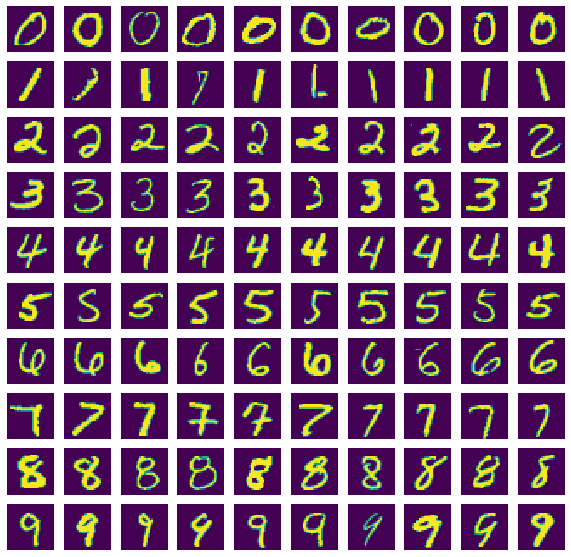

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print('\033[1m' + "Output of the softmax layer" + '\033[0m')
plt.figure(figsize=(10, 10))

for d in range(10):
    images = X_test_1000[np.argmax(al_val, axis=1) == d]
    images = images[:min(10, len(images))]
    for i in range(len(images)):
        plt.subplot(10, 10, d * 10 + i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.axis('off')

Output of the second last layer


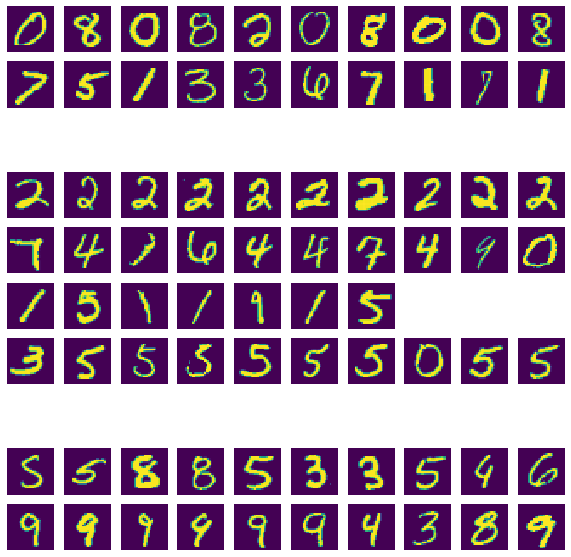

In [21]:
plt.figure(figsize=(10, 10))

rand_units = np.random.choice(np.arange(1, 1024), 10)

print('\033[1m' + "Output of the second last layer" + '\033[0m')
for d in range(len(rand_units)):
    images = X_test_1000[np.argmax(a5_val[:,rand_units], axis=1) == d]
    images = images[:min(10, len(images))]
    for i in range(len(images)):
        plt.subplot(10, 10, d * 10 + i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.axis('off')

We are choosing 10 random nodes from 1024 nodes in the second to last layer to display the output. We can see that some of the rows are blank or partially empty. This is because these nodes don't get activated for that particular image. Also, we observe that many of the rows are empty indicating that the nodes doesn't get activated for any image. This shows that some nodes might be useless. Also, we see that few images appear together, this is because they might share similar features. 

Due to many useless nodes, it might be an ideal situation to have lesser number of nodes, i.e., reducing the layer size. The network would perform faster without affecting the performance. 

### PCA and T-SNE Visualizations of Layers

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Get the digits for each sample
digits = np.argmax(Y_test_1000, axis=1)


In [28]:
# Function to plot PCA 
def pca_plot(plot,x,head):
    pca = PCA(n_components=2)
    pca_mnist = pca.fit_transform(x)  


    plot.scatter(pca_mnist[:,0], pca_mnist[:,1], c=digits, cmap="Spectral")
    plot.set_title(head)
    for i in range(10):
        lb_x,lb_y = np.mean(pca_mnist[digits==i],axis=0)
        plot.text(lb_x,lb_y,i,fontsize=40,ha='center',va='center')

# Function to plot T-SNE
def tsne_plot(plot,x,head):
    tsne = TSNE(n_components=2)
    tsne_mnist = tsne.fit_transform(x)


    plot.scatter(tsne_mnist[:,0], tsne_mnist[:,1], c=digits, cmap="Spectral")
    plot.set_title(head)
    for i in range(10):
        lb_x,lb_y = np.mean(tsne_mnist[digits==i],axis=0)
        plot.text(lb_x,lb_y,i,fontsize=40,ha='center',va='center')

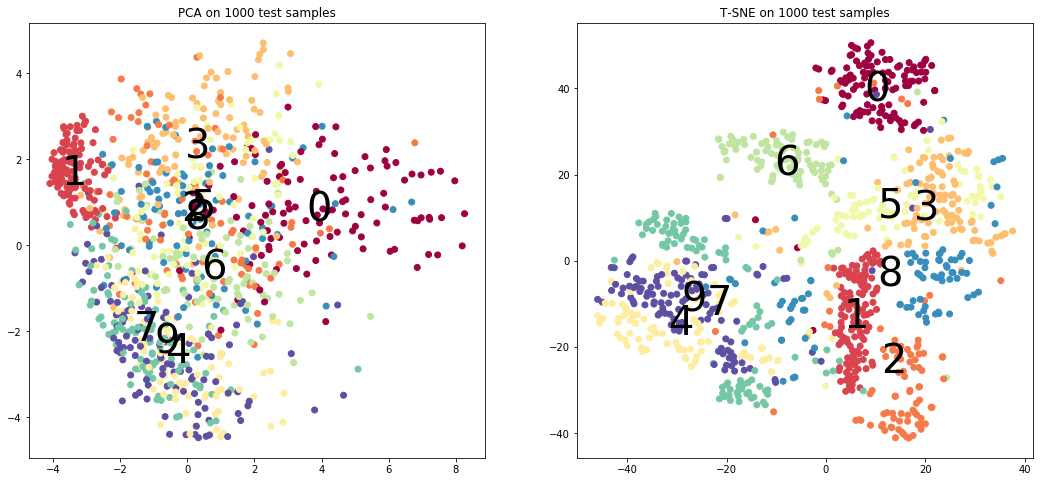

In [29]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],X_test_1000,"PCA on 1000 test samples")
tsne_plot(plot[1],X_test_1000,"T-SNE on 1000 test samples")

T-SNE has better separation of input samples compared to PCA. However, the images don't seem to be separable.

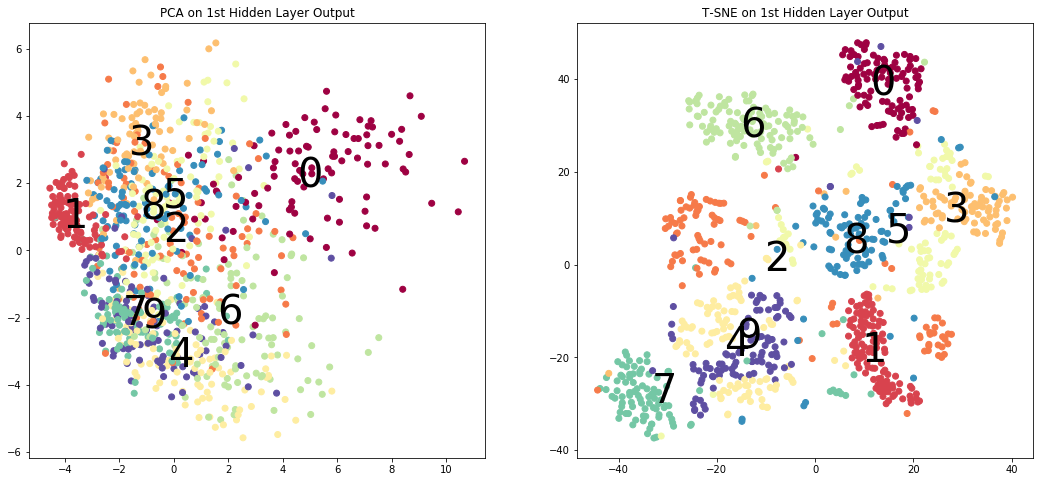

In [114]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],a1_val,"PCA on 1st Hidden Layer Output")
tsne_plot(plot[1],a1_val,"T-SNE on 1st Hidden Layer Output")

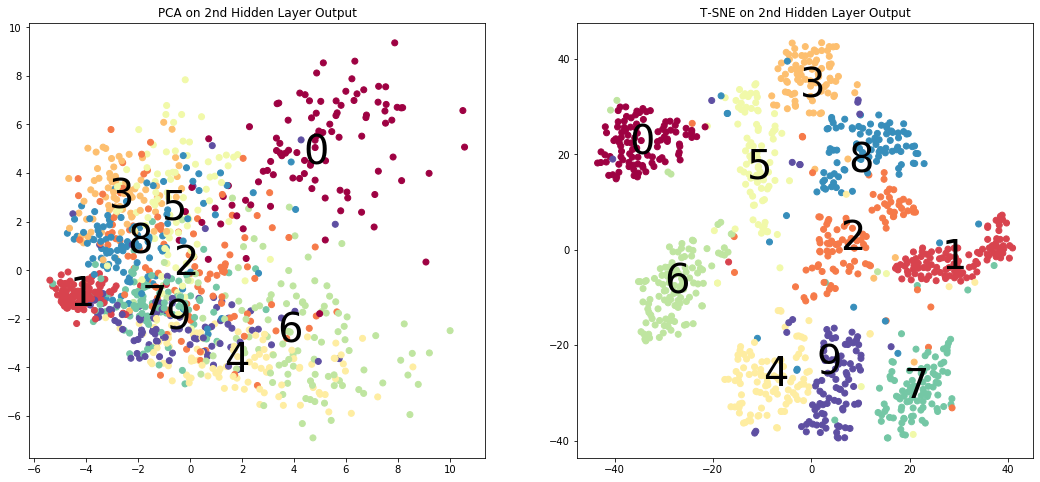

In [115]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],a2_val,"PCA on 2nd Hidden Layer Output")
tsne_plot(plot[1],a2_val,"T-SNE on 2nd Hidden Layer Output")

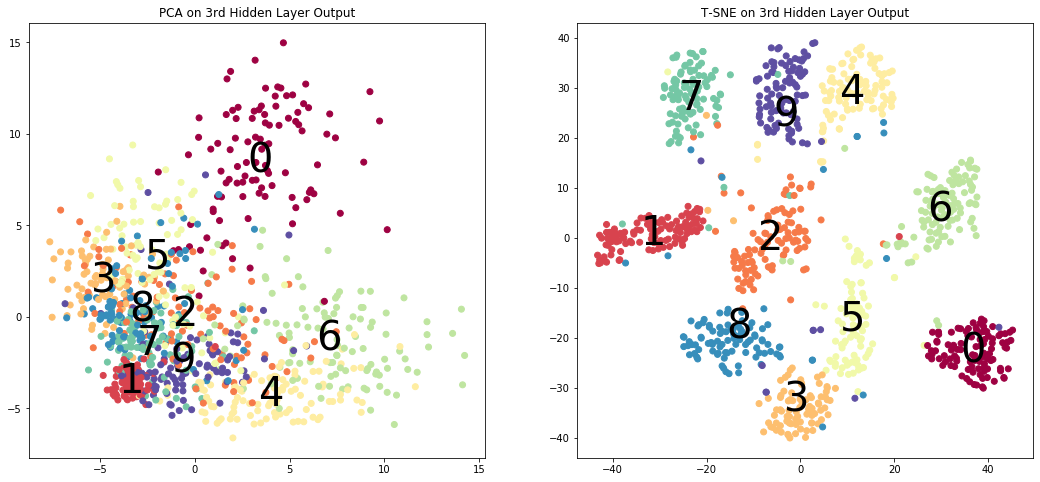

In [116]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],a3_val,"PCA on 3rd Hidden Layer Output")
tsne_plot(plot[1],a3_val,"T-SNE on 3rd Hidden Layer Output")

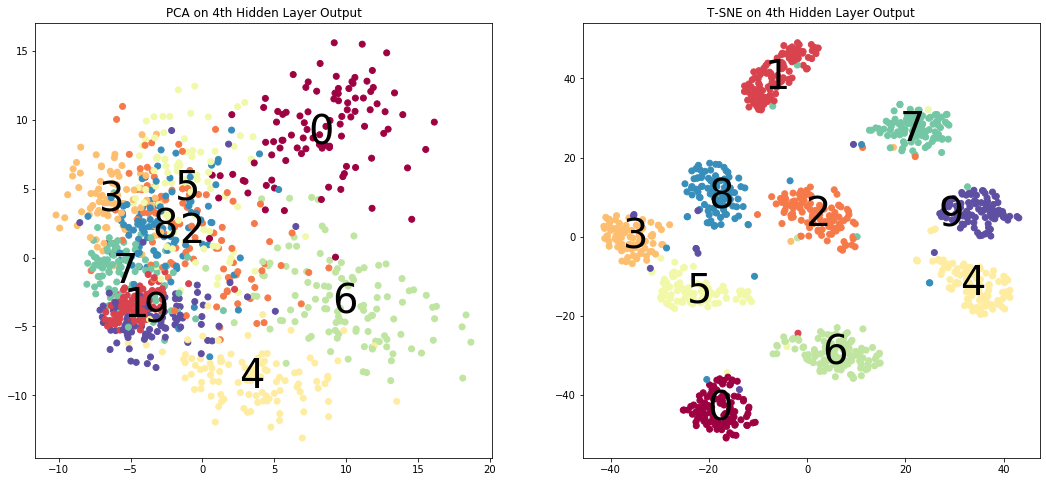

In [117]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],a4_val,"PCA on 4th Hidden Layer Output")
tsne_plot(plot[1],a4_val,"T-SNE on 4th Hidden Layer Output")

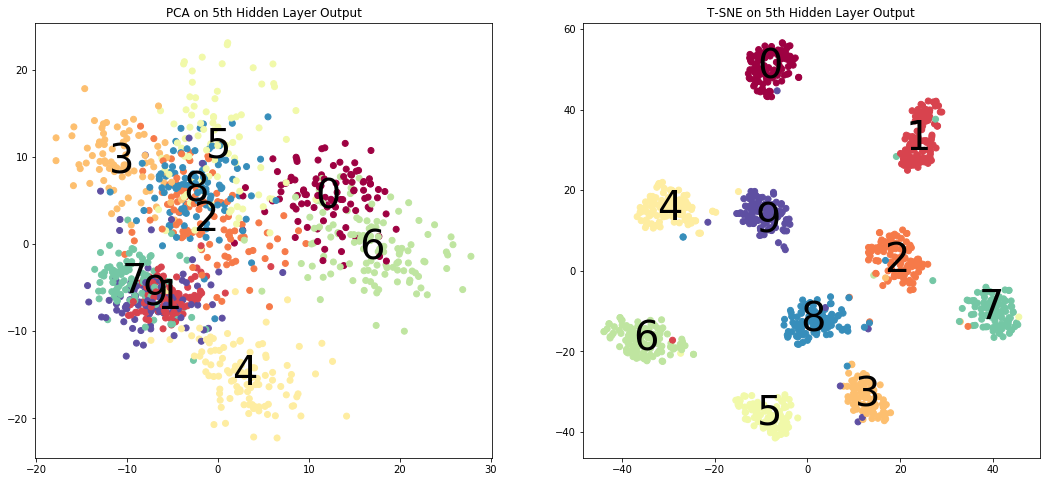

In [118]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],a5_val,"PCA on 5th Hidden Layer Output")
tsne_plot(plot[1],a5_val,"T-SNE on 5th Hidden Layer Output")

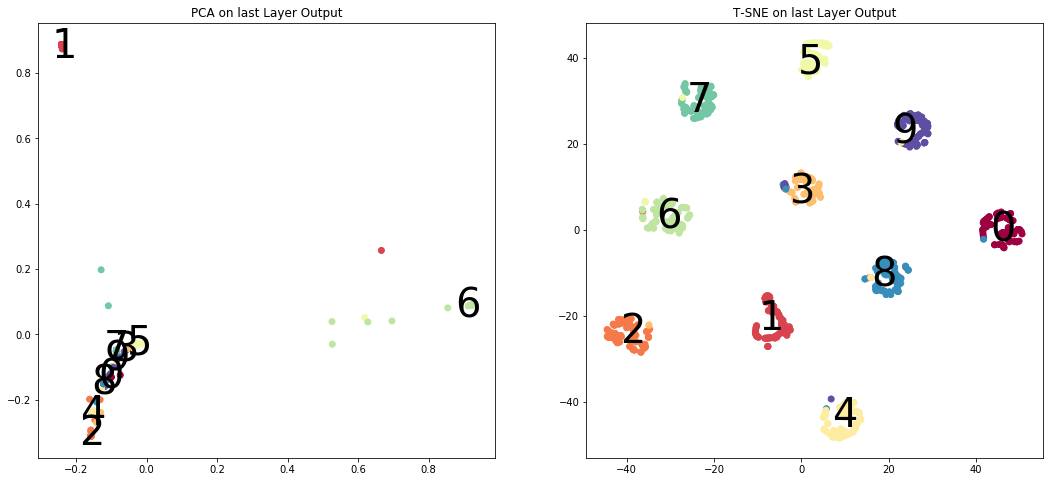

In [119]:
fig, plot = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.prism()

pca_plot(plot[0],al_val,"PCA on last Layer Output")
tsne_plot(plot[1],al_val,"T-SNE on last Layer Output")

As we can see from the above visualizations, every subsequent layer produces better separation. This is because the input data is transformed into higher dimensional space (1024) and each layer produces more complex features, making the data  efficiently separable. We also observe that T-SNE which is a non-linear dimentionality reduction technique has more separation than PCA for all the layers which transforms the data linearly into lower dimensional space.